# Mini project 8.1.3:  Part 1a

# Inferential Statistics:  Frequentism

## Step:  Set up

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

## Part I:  Sampling from the normal distribution

**Q:** Call up the documentation for the norm function imported above. What is the second listed method?

* The docs are located at:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
* The second listed method is the probability density function

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

In [2]:
# Draw five samples
seed(47)
samples = norm.rvs(size=5)
print('Here are some samples:  {}'.format(samples))

Here are some samples:  [-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

In [3]:
# Calc mean
sample_mean = np.mean(samples)
print('The mean is {}'.format(sample_mean))

The mean is 0.19355593334131074


Takeaways:

* Sure, that's close to what is expected.  
* The sample mean is close to the populations means, which is 0
* The sample mean is within 1 standard devision of the population mean, which is more likely than not.

__Q:__ What is the standard deviation of these numbers?

In [4]:
# Calc the standard deviation by hand
std = np.sqrt((np.sum((samples - sample_mean)**2))/len(samples))
print('The standard deviation of the sample is {}'.format(std))

The standard deviation of the sample is 0.9606195639478641


__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator).

In [5]:
# Use the sample to estimate the population mean
# That is, correct using n-1 otherwise you overestimate
std_pop = np.sqrt((np.sum((samples - sample_mean)**2))/(len(samples)-1))
print('The standard deviation of the population is {}'.format(std_pop))

The standard deviation of the population is 1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [6]:
# Compare to numpy's calc
print('The standard deviation calc from numpy is {}'.format(np.std(samples)))
print()
print("Nuympy's standard deviation calc for a population from a sample is {}".format(np.std(samples, ddof=1)))

The standard deviation calc from numpy is 0.9606195639478641

Nuympy's standard deviation calc for a population from a sample is 1.0740053227518152


Takeaways:
    
* Numpy does a straight calculation of standard devisions
* Here's the docs:  https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
* To account for the fact you're workign with a sample, you use the parapmeter, ddof=1
* There are two terms
    * sample standard deviation:  Aka, using n-1, a calc of the population parameter.
    * standard deviation of the sample:  Aka, using n

## Part II:  Sampling distributions

In [7]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

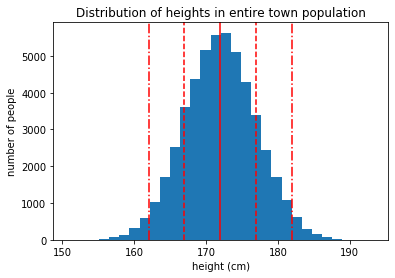

In [8]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

In [9]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

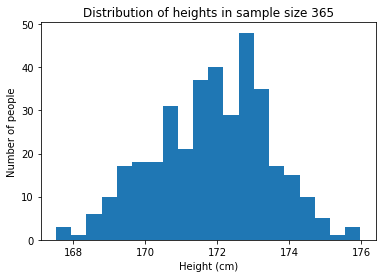

In [10]:
# Collect 365 samples
seed(47)
daily_sample_mean = []
for i in range(365):
    daily_sample = townsfolk_sampler(10)
    daily_sample_mean.append(np.mean(daily_sample))
daily_sample_mean = np.asarray(daily_sample_mean)

# Graph them
_ = plt.hist(daily_sample_mean, bins=20)
_ = plt.xlabel('Height (cm)')
_ = plt.ylabel('Number of people')
_ = plt.title('Distribution of heights in sample size 365')

__Q:__ Verify the following results from the CLT.  The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be  𝜎/𝑛⎯⎯√ , which, in this case, should be approximately 1.58.

In [11]:
print('The means of the population is 172')
print('The mean of my samples is {}'.format(daily_sample_mean.mean()))
print('The standard deviation of the population is 5')
print('The sample standard deviation is {}'.format(daily_sample_mean.std()))
print('The expected value for standard deviation of samples (aka, sigma / root n) is {}'.format(5/(10**.5)))

The means of the population is 172
The mean of my samples is 171.8660049358649
The standard deviation of the population is 5
The sample standard deviation is 1.5756704135286475
The expected value for standard deviation of samples (aka, sigma / root n) is 1.5811388300841895


__Q:__ Repeat the above year's worth of samples but for a sample size of 50

The mean of my samples is 171.94366080916114
The sample standard deviation is 0.6736107539771146


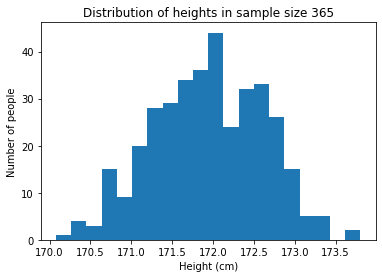

In [12]:
# Calculate daily means from the larger sample size here
# Collect 365 samples
size = 50
seed(47)
daily_sample_mean = []
for i in range(365):
    daily_sample = townsfolk_sampler(size)
    daily_sample_mean.append(np.mean(daily_sample))
daily_sample_mean = np.asarray(daily_sample_mean)

# Graph them
_ = plt.hist(daily_sample_mean, bins=20)
_ = plt.xlabel('Height (cm)')
_ = plt.ylabel('Number of people')
_ = plt.title('Distribution of heights in sample size 365')


# Give calcs
print('The mean of my samples is {}'.format(daily_sample_mean.mean()))
print('The sample standard deviation is {}'.format(daily_sample_mean.std()))

__Q:__ Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

Takeaways:
    
* I would expect the same number of larger samples to be narrower (aka, truer to the population mean)
* I would expect the estimated parameters to be closer to the true population parameter
* And they are!

## Part III:  Normally testing times!

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

The basic rule of thumb is 65-95-99.7.  That is,

* The probability of an observation being 
* within 1, 2 and 3 standard deviations from the mean
* on a normal distribution is 
* 68.27%, 95.45% and 99.73%

Here, we're asking what's the probability of observing the value of 1 or less.

* There's 68.27% in the main body.  
* And 31.73% in the upper and lower tails, combined
* And 15.864 in each tail
* Here, we're asking about the probability of everything that's not in the upper tail (aka, greater than 1), which is:
* 84.135

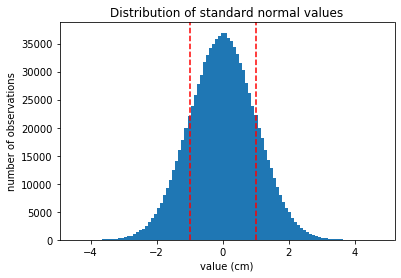

In [13]:
# Show this visually
seed(47)
pop = norm.rvs(0, 1, size=1000000)
_ = plt.hist(pop, bins=100)
_ = plt.xlabel('value (cm)')
_ = plt.ylabel('number of observations')
_ = plt.title('Distribution of standard normal values')
_ = plt.axvline(1, color='r', linestyle='--')
_ = plt.axvline(-1, color='r', linestyle='--')

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

In [14]:
# Calc using scipy's norm.cdf()
print('The probability of getting a 1 or less in a standard normal distro is {}'.format(norm.cdf(1)))

The probability of getting a 1 or less in a standard normal distro is 0.8413447460685429


__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

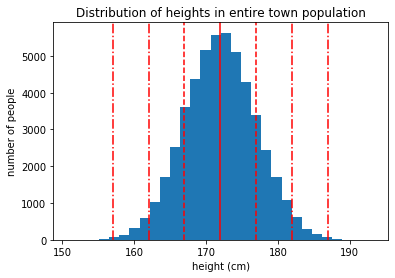

In [15]:
# Approach 1:  Visual inspection
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')
_ = plt.axvline(172+15, color='r', linestyle='-.')
_ = plt.axvline(172-15, color='r', linestyle='-.')

Takeaway:
    
* 177 is at 1 standard deviation (aka, 172 + 5)
* Aka, same answer as above

In [16]:
# Approach 2:  Calc via cdf
prob = norm.cdf(x=177, loc=172, scale=5)
print(prob)

0.8413447460685429


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

Via visual inspection, it's clear than 200 is very much an outlier.  Aka, it's more than 3 standard devisions from the mean.  It's very unlikely.

In [17]:
# Approach 1:  Calc via cdf
prob = norm.cdf(x=200, loc=172, scale=5)
print(prob)

0.9999999892824097


__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [18]:
seed(47)
# take your sample now
sample3_size = 50
sample3 = townsfolk_sampler(sample3_size)
sample3_mean = np.mean(sample3)
sample3_std = np.std(sample3, ddof=1)
print('The pop mean estimated from this sample is {}'.format(sample3_mean))
print('The pop std estimated from this sample is {}'.format(sample3_std))

The pop mean estimated from this sample is 172.7815108576788
The pop std estimated from this sample is 4.195424364433547


In [23]:
# Conduct a two tailed test at 95% with 2.5% in each tail
crit_value = norm.pdf(.975)
standard_error = sample3_std / np.sqrt(sample3_size)
margin_of_error = crit_value * standard_error
print('The margin of error is {}'.format(margin_of_error))

The margin of error is 0.14715511542988677


In [20]:
ci_lower = sample3_mean - margin_of_error
ci_upper = sample3_mean + margin_of_error
print('The lower limit of the confidence interval is {}'.format(ci_lower))
print('The upper limit of the confidence interval is {}'.format(ci_upper))

The lower limit of the confidence interval is 172.6343557422489
The upper limit of the confidence interval is 172.92866597310868


Takeaways:

* Yes, this interval does include the population parameters

__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

When the standard deviation of the population isn't know, we should use a t-test.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

In [21]:
crit_value2 = t.ppf(0.975, size-1)
margin_of_error2 = crit_value2 * standard_error
print('The 95% margin of error is {}'.format(margin_of_error2))

The 95% margin of error is 1.1923264102757953


In [22]:
ci_lower2 = sample3_mean - margin_of_error2
ci_upper2 = sample3_mean + margin_of_error2
print('The lower limit of the confidence interval is {}'.format(ci_lower2))
print('The upper limit of the confidence interval is {}'.format(ci_upper2))

The lower limit of the confidence interval is 171.589184447403
The upper limit of the confidence interval is 173.9738372679546


Takeaways:

* Yes, this interval does include the population parameters